In [ ]:
# for the  dataset :
#test dataset :https://www.kaggle.com/competitions/digit-recognizer/data?select=test.csv
#train dataset:https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
data =pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [16]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. #we are normalizing the data as white is 0 and black in 255 we are converting it to the reange of 0 and 1

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [17]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [18]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,0.10,500)

Iteration:  0
[2 5 1 ... 7 4 5] [1 4 5 ... 7 3 0]
0.1381219512195122
Iteration:  10
[4 0 3 ... 7 4 0] [1 4 5 ... 7 3 0]
0.20178048780487806
Iteration:  20
[4 0 3 ... 7 2 0] [1 4 5 ... 7 3 0]
0.26890243902439026
Iteration:  30
[4 4 3 ... 7 2 0] [1 4 5 ... 7 3 0]
0.3294146341463415
Iteration:  40
[4 4 3 ... 7 2 0] [1 4 5 ... 7 3 0]
0.3986585365853659
Iteration:  50
[1 4 8 ... 7 2 0] [1 4 5 ... 7 3 0]
0.4773170731707317
Iteration:  60
[1 4 8 ... 7 2 0] [1 4 5 ... 7 3 0]
0.5401707317073171
Iteration:  70
[1 4 8 ... 7 3 0] [1 4 5 ... 7 3 0]
0.5777073170731707
Iteration:  80
[1 4 8 ... 7 3 0] [1 4 5 ... 7 3 0]
0.6063414634146341
Iteration:  90
[1 4 8 ... 7 3 0] [1 4 5 ... 7 3 0]
0.629780487804878
Iteration:  100
[1 4 8 ... 7 3 0] [1 4 5 ... 7 3 0]
0.6487804878048781
Iteration:  110
[1 4 3 ... 7 3 0] [1 4 5 ... 7 3 0]
0.6658048780487805
Iteration:  120
[1 4 3 ... 7 3 0] [1 4 5 ... 7 3 0]
0.682
Iteration:  130
[1 4 3 ... 7 2 0] [1 4 5 ... 7 3 0]
0.6953170731707317
Iteration:  140
[1 4 3 ... 7 

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


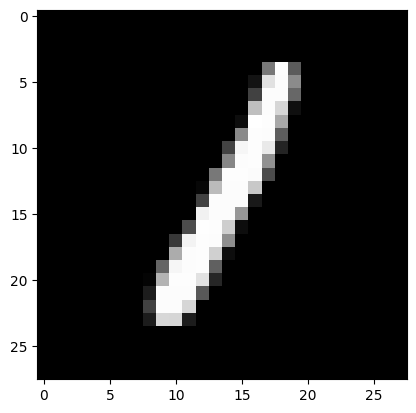

Prediction:  [4]
Label:  4


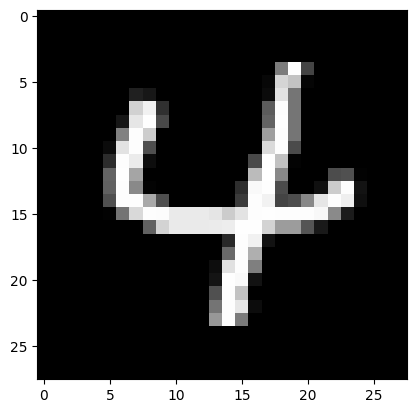

Prediction:  [5]
Label:  5


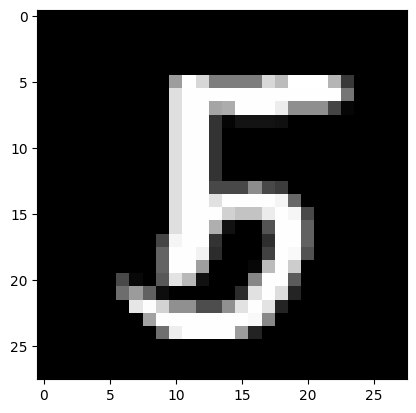

Prediction:  [1]
Label:  7


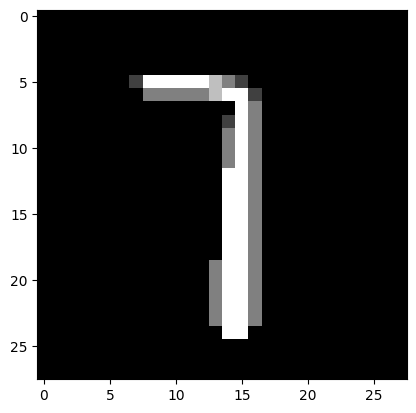

In [21]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [29]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
def get_accuracy1(pred,y):
    for i,j in zip(pred,y):
        if i==j:
            print(i,j,sep="<---->",end="\t\t")
        else:
            print(i,j,sep="<-//->",end="\t\t")
    return np.sum(pred == y) / y.size
            
get_accuracy1(dev_predictions, Y_dev)

8<---->8		7<---->7		5<-//->3		4<---->4		8<---->8		7<---->7		0<---->0		1<---->1		7<---->7		3<---->3		0<---->0		2<---->2		1<-//->3		3<-//->1		7<-//->9		5<---->5		3<---->3		8<---->8		9<---->9		9<---->9		9<---->9		6<---->6		9<---->9		5<---->5		0<---->0		7<---->7		3<---->3		3<---->3		2<---->2		8<---->8		1<---->1		0<---->0		6<---->6		0<---->0		6<---->6		0<---->0		4<---->4		5<---->5		3<---->3		6<---->6		1<---->1		4<---->4		9<---->9		3<---->3		8<-//->1		1<---->1		8<-//->2		6<---->6		7<---->7		3<---->3		3<-//->7		4<-//->9		5<---->5		6<---->6		4<---->4		0<---->0		7<---->7		7<---->7		0<---->0		5<-//->8		2<---->2		7<---->7		0<-//->8		9<---->9		2<---->2		7<-//->2		8<---->8		0<---->0		8<---->8		7<---->7		3<---->3		2<---->2		8<---->8		7<---->7		1<---->1		1<---->1		2<---->2		6<-//->2		3<---->3		8<-//->3		9<-//->3		4<---->4		2<---->2		3<---->3		6<---->6		0<---->0		8<-//->9		3<---->3		0<---->0		3<---->3		6<---->6		6<---->6		3<---->3		6<---->6		5<---->5		2<---->2		7<---->7		4<---->4		1<---->1		2<---->2		

0.843